In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Logistic regression

Regression means that we try to find the best-fit set parameters. Finsing the best-fit is similar to regression, and in this method it's how we train our classifier. Optimization algorithms are used to find the parametres. Logistic regression, instead of its name, is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorthms for classification in industry. 

The logistic regression model is also a linear model for binary classificaiton that can be extended to multiclass classification via the OvR technique. Logistic regression can be seen as a **probabilistic model**.

**Pros**
Computationally inexpensive, easy to implement, knowledge representation easy to interpret.
**Cons**
Prone to underfitting, may have low accuracy.
**Works with**
Numeric values, nominal values

For the logistic regression classifier we 'll our features and multiply each one by a weight and then add them up. This result will be put into the sigmoid, and we'll get a number between 0 and 1. Anything above 0.5 we'll classify as a 1, and anything below 0.5 we'll classify as a 0. You can also think as a logistic regression as a probability estimate.


### Logistic Function
It is also known as sigmoid function due to its characteristic S-shape. It is the inverse form of the logit function. This funcion takes real number values as input and transform them to values in the range [0,1]. The output of the sigmoid function is then interpreted as the probability of particular sample belonging to class 1. There are many applications where we are not only interested in the predicted class labels, but the **class-membership probability**. Logistic regression can be used in weather forecasting and disease detection.

The predicted probability can then simply be coverted into a binary outcome via quatizer (unit step function).

$$y =
\left\{
    \begin{array}{ll}
        1 & \mbox{if } \phi (z) \geq 0.5 \\
        0 & otherwise
    \end{array}
\right.$$

This is also equivalent

$$y =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } z \geq 0 \\
		0 &  otherwise
	\end{array}
\right.$$

In [13]:
def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))

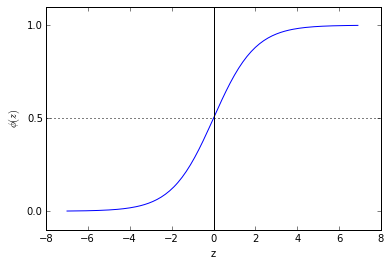

In [14]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z,)
plt.axvline(0.0, color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

### Step function

(-0.1, 1.1)

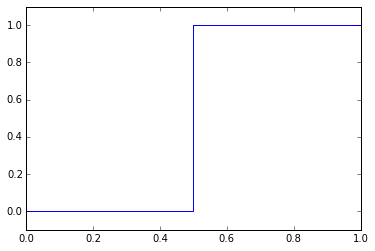

In [29]:
x = [0, 0.5, 1.0] 
y = [0, 0, 1]

plt.step(x, y)
plt.ylim(-0.1,1.1)

In [2]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, floar(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).traspose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.traspose() * error
    return weights

## Stochastic Gradient Ascent

It is an example of an online learning algorithm. This is known as online because we can incrementally update the classifier as new data comes in rather thatn all at once. The all-at-once is known as **batch processing**.

In [4]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] -h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [5]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

### Logistic Regression model with scikit-learn

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Normal Standard deviation of u and sigma parameters
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [12]:
from sklearn.linear_model import LogisticRegression
from plotting import *
# C parameter is inversed regarding to regularization
lr = LogisticRegression(C=1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150),
                     xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

In [7]:
lr.predict_proba(X_test_std[0,:])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

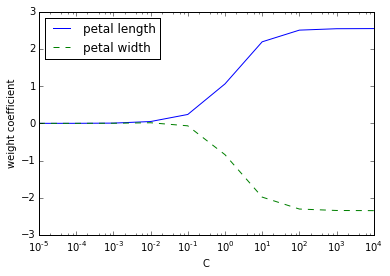

In [16]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

## Logistic Regression 3-class Classifier
Source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

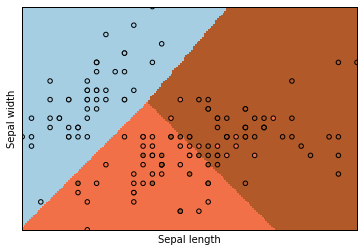

In [22]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

h = .02 # Step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y)

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c = y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()